# Ising Model Project 
The Ising Hamiltonian can be written as,
$$ \mathcal{H} = -J \sum_{\langle i j \rangle} \sigma_{i} \sigma_{j}. $$

The spins $ \sigma_{i} $ can take values $ \pm 1 $ 
<br>
$ \langle i j \rangle $ implies nearest-neighbor interaction only 
<br>
$ J>0 $ is the strength of exchange interaction.

Included below is an abbreviated version of some of the routines used in plotting the graphical output during the project. The full code should be included inside the project directory. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ising

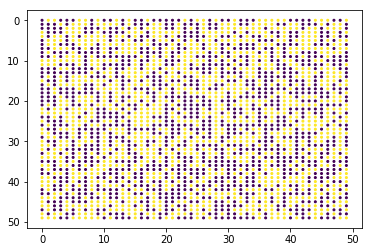

In [9]:
solve = ising.IsingSolver(1, grid_type='square', dim=50, initial_state='hot')
solve.print_system(solve.moments) #the ploting routine in the IsingSolver Class

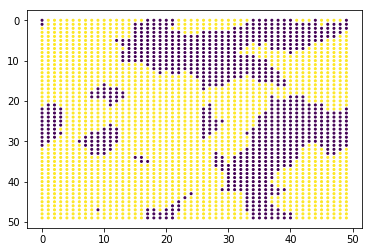

In [10]:
itr = 5
solve.run(num_itr = itr, T=1) #The routine that computes the MH algorithm for the number of iterations given
solve.print_system(solve.moments)

Plotting of the nuber of iterations it takes to reach equilibrium

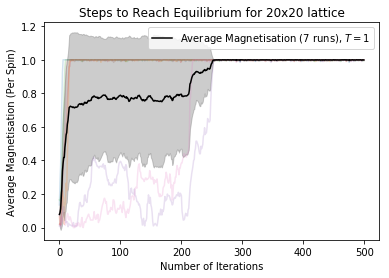

In [5]:
temps = np.arange(0.1, 5, 0.1)
itrs = 500
x = np.arange(0, 500, 1) #number of iterations for plotting
plot_elements = 7 #number of runs

plt.figure(1)
a = []
for i in range(plot_elements):
    solve = ising.IsingSolver(1, grid_type='square', dim=20, initial_state='hot', H=0)
    solve.run(num_itr = itrs, T=1)
    
    #appending to a new list to compute mean and standard deviation
    a.append(np.abs(solve.maglist))
    plt.plot(x, np.abs(solve.maglist), alpha=0.2)

f = np.mean(a, axis=0)
g = np.std(a, axis=0)
plt.plot(x, f, color='k', label='Average Magnetisation (%d runs), $T=1$' % plot_elements)
plt.fill_between(x, f+g,f-g,  color='grey', alpha=0.4)

plt.title("Steps to Reach Equilibrium for 20x20 lattice")
plt.xlabel("Number of Iterations")
plt.ylabel("Average Magnetisation (Per Spin)")
plt.legend()

Plotting of Average Magnetisation as a function of Temperature

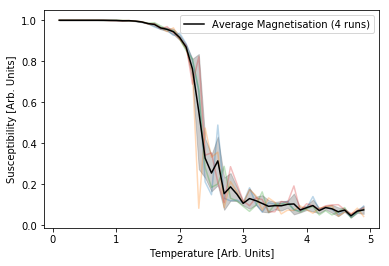

In [11]:
temps = np.arange(0.1, 5, 0.1)
itr = 10
relax = 350
plot_elements = 4 # number of runs to compute

#Osengar's Solution for Magnetisation in 2D Square Lattice 
def exact_solution(t):  
    return (1 - 1/(np.sinh(2/t)**4))**(1/8)

t_c = 2/np.log(1 + np.sqrt(2)) #t_c 2D square
t_d= 4/np.log(3) #t_c 2D triangle
t_f = 2/np.log(2 + np.sqrt(3)) #t_c 2D hexagon
new_temps = np.arange(0.1, t_c, 0.01)
solve = ising.IsingSolver(1, grid_type='square', dim=20, initial_state='cold')

a = []
for i in range(plot_elements):
    mag_list = np.zeros(len(temps)) #array (1D) of magnetisation values for each run
    #mag_sus = np.zeros(len(temps))
    i = 0
    
    for t in temps:
        solve.maglist = [] #list of magnetisations at each temperature
        solve.run(num_itr = itr+relax, T=t)
        
        mag_list[i] = np.mean(np.abs(solve.maglist[relax:]))
        #mag_sus[i] = (1/t)*np.var(np.abs(solve.maglist[relax:]))
        
        i += 1
    
    a.append(mag_list)
    
    plt.plot(temps, mag_list, alpha=0.3)
    #plt.plot(temps, mag_sus, alpha=0.3)

f = np.mean(a, axis=0)
g = np.std(a, axis=0)
plt.plot(temps, f, color='k', label='Average Magnetisation (%d runs)' % plot_elements)
plt.fill_between(temps, f+g,f-g,  color='grey', alpha=0.4)
#plt.plot(new_temps, exact_solution(new_temps))
#plt.axvline(x=t_f)
plt.xlabel("Temperature [Arb. Units]")
plt.ylabel("Susceptibility [Arb. Units]")
plt.legend()

KeyboardInterrupt: 

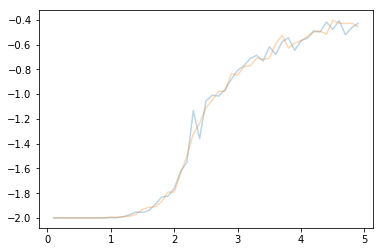

In [12]:
a = []
for i in range(plot_elements):
    ene_list = np.zeros(len(temps))
    #heat_cap = np.zeros(len(temps))
    i=0
    for t in temps:
        solve.avenglist = [] #list of energies at each temperature
        solve.run(num_itr=itr+relax, T=t)
    
        ene_list[i] = np.mean(solve.avenglist[relax:])
        #heat_cap[i] = (1/t**2)*np.var(solve.avenglist[relax:])
        i += 1
    
    a.append(ene_list)    
    plt.plot(temps, ene_list, alpha=0.3)

f = np.mean(a, axis=0)
g = np.std(a, axis=0)
plt.plot(temps, f, color='k', label='Average Energy (%d runs)' % plot_elements)
plt.fill_between(temps, f+g,f-g,  color='grey', alpha=0.4)
plt.xlabel('Temperature [Arb. Units]')
plt.ylabel('Average Energy per Site [Arb. Units]')
plt.legend()

In [ ]:
solve = ising.IsingSolver(1, grid_type='line', dim=30, initial_state='cold', intr='decay', a=10)

a = []
for i in range(plot_elements):
    mag_list = np.zeros(len(temps))
    mag_sus = np.zeros(len(temps))
    i = 0
    
    for t in temps:
        solve.maglist = []
        solve.run(num_itr = itr+relax, T=t)
        
        mag_list[i] = np.mean(np.abs(solve.maglist[relax:]))
        #mag_sus[i] = (1/t)*np.var(np.abs(solve.maglist[relax:]))
        
        i += 1
    
    a.append(mag_list)
    
    plt.plot(temps, mag_list, alpha=0.3)
    #plt.plot(temps, mag_sus, alpha=0.3)

f = np.mean(a, axis=0)
g = np.std(a, axis=0)
plt.plot(temps, f, color='k', label='Average Magnetisation (%d runs)' % plot_elements)
plt.fill_between(temps, f+g,f-g,  color='grey', alpha=0.4)
plt.xlabel("Temperature [Arb. Units]")
plt.ylabel("Spontaneous Magnetisation [Arb. Units]")
plt.legend()

In [ ]:
a = []
for i in range(plot_elements):
    solve = ising.IsingSolver(1, grid_type='square', intr='nextnn',dim=20, initial_state='hot', H=0, J=[1,0.5])
    solve.run(num_itr = itr, T=1)
    a.append(np.abs(solve.maglist))
    plt.plot(x, np.abs(solve.maglist), alpha=0.2)

f = np.mean(a, axis=0)
g = np.std(a, axis=0)
plt.plot(x, f, color='k', label='Average Magnetisation (%d runs), $T=1$' % plot_elements)
plt.fill_between(x, f+g,f-g,  color='grey', alpha=0.4)

plt.title("Steps to Reach Equilibrium for 20x20 lattice")
plt.xlabel("Number of Iterations")
plt.ylabel("Average Magnetisation (Per Spin)")
plt.legend()